In [1]:
library(tidyverse)
library(ggplot2)
library(scales)
library(stringr)
library(RColorBrewer)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




# PCA


In [2]:
# open eigenval and eigenvec files
pca <- read_table("/kaggle/input/leo-pca/21samples_pca.eigenvec", col_names = FALSE)
eigenval <- scan("/kaggle/input/leo-pca/21samples_pca.eigenval")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character(),
  X2 = col_character()
)
ℹ Use `spec()` for the full column specifications.



In [3]:
# sort out the pca data
# remove nuisance column
pca <- pca[,-1]
# set names
names(pca)[2:ncol(pca)] <- paste0("PC", 1:(ncol(pca)-1))

In [4]:
# check 
pca
nrow(pca)

X2,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D13230,0.215475,0.00313850,-0.03367390,0.01090460,-0.064006500,0.061250800,-0.091371900,-0.22400800,0.60767900,⋯,-0.25017600,-5.01250e-02,-0.14680200,0.044110500,-0.12720300,0.003614140,-0.27719900,0.120569000,-0.025864400,-0.026252700
LEO208,0.220348,0.03975010,-0.04736040,0.01940270,0.108076000,0.335309000,-0.327057000,0.14563600,-0.23994400,⋯,-0.14589400,1.74322e-02,0.15282700,0.009883460,-0.10484200,-0.003911820,0.01573530,-0.001837920,0.010602700,0.731839000
PP01,0.193252,0.03038890,-0.00299870,0.00230370,0.148395000,-0.447881000,0.106794000,-0.14836900,-0.23523800,⋯,-0.13470700,-1.86679e-03,-0.13019500,0.050133500,-0.41737300,-0.067913500,0.52870900,-0.209956000,0.054070200,-0.029592700
PP02_2,0.218282,-0.00384259,-0.02494860,0.00320417,0.118242000,-0.001950640,-0.098647900,0.13575200,-0.08174240,⋯,0.66302700,1.71892e-02,-0.10718500,-0.052832900,0.44285600,0.059870300,0.08615000,-0.067077000,0.031650400,-0.067636400
PP04,0.223593,0.00715404,-0.04359150,0.01484310,0.143042000,-0.077264400,-0.070459600,-0.19074900,0.02535550,⋯,0.50478300,1.24823e-02,-0.21837900,0.038534800,-0.48747000,-0.027679400,-0.31977000,0.159726000,-0.064785900,0.036344000
PP05_2,0.220906,-0.00746529,-0.03778520,0.04647070,-0.052442200,0.003656080,0.333462000,0.78828400,0.32869800,⋯,-0.03889020,-7.75975e-03,-0.09744390,0.010407500,-0.11491200,-0.017502200,0.10621000,-0.050825000,0.000153128,-0.003493730
PP06_2,0.211957,-0.00662050,-0.03516730,0.00922856,0.032819400,0.447396000,0.673982000,-0.38526700,0.01066530,⋯,0.07077390,-1.73378e-02,0.28107800,-0.001734670,0.06072420,0.010400800,0.12932700,-0.059645500,0.014317800,0.022191600
PP06,0.210549,-0.00700563,-0.00674707,0.00160066,0.233572000,-0.486556000,0.228999000,0.07652420,-0.27203700,⋯,-0.23013100,1.24523e-02,0.31066700,-0.031915400,0.22717700,0.042153900,-0.49209200,0.208319000,-0.059746800,0.000834818
PP08,0.212164,0.02727910,-0.03211670,0.01322350,0.075096800,0.383808000,-0.327467000,0.14034300,-0.26722100,⋯,-0.15911700,2.46886e-02,0.22433700,0.018193300,-0.18101600,-0.022024500,-0.01950180,0.023621900,-0.011865200,-0.673812000


[1] 21

In [5]:
# add locations info 
pca['Locations'] <- c('Asia (Prim. krai)', 'Asia (Prim. krai)', 'Asia (Prim. krai)', 'Asia (Prim. krai)', 'Asia (Prim. krai)',
                'Asia (Prim. krai)', 'Asia (Prim. krai)', 'Asia (Prim. krai)', 'Asia (Prim. krai)', 'Asia (Prim. krai)',
                'Asia (Prim. krai)', 'Asia (Prim. krai)', 'Africa', 'Africa', 'Africa',
                'Asia', 'Asia', 'Asia', 'Africa', 'Africa',
                'Africa')

In [6]:
# add proportion of variance explained 
pve <- data.frame(PC = 1:20, pve = eigenval/sum(eigenval)*100)
pve

PC,pve
<int>,<dbl>
1,16.189340
2,10.497173
3,9.125956
4,8.236784
5,4.933936
6,4.373841
7,4.284560
8,4.147191
9,3.907240


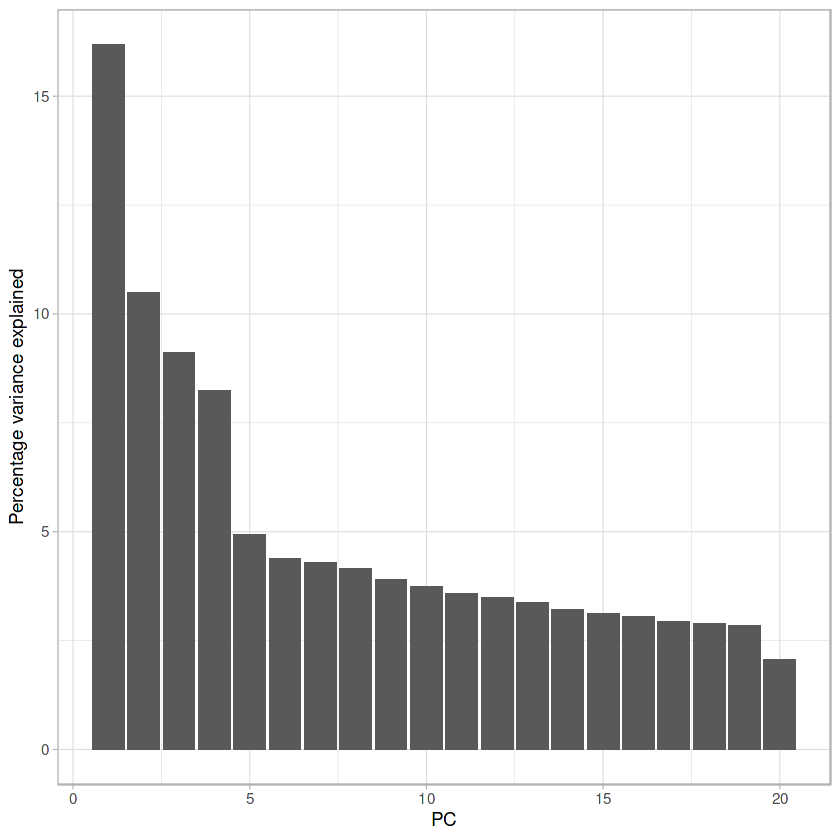

In [7]:
# plot pve
a <- ggplot(pve, aes(PC, pve)) + geom_bar(stat = "identity")
a + ylab("Percentage variance explained") + theme_light()

In [7]:
pca$X2[pca$X2 == 'ERR5056141'] <- 'PP141'
pca$X2[pca$X2 == 'ERR5056152'] <- 'PP152'
pca$X2[pca$X2 == 'ERR5671313'] <- 'PP313'

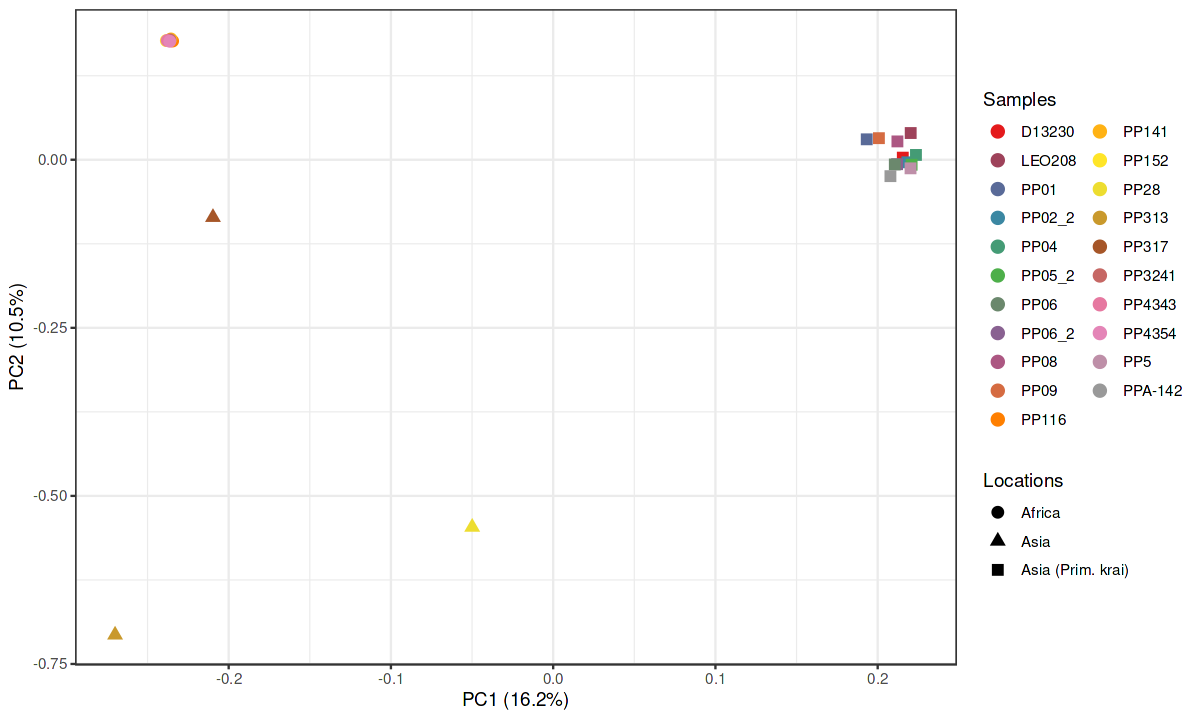

In [8]:
# plot pca
colourCount = length(unique(pca$X2))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

options(repr.plot.width = 10, repr.plot.height = 6)
pplot <- ggplot(pca, aes(PC1, PC2, col = X2, shape = Locations)) +
    geom_point(size = 3) +
    theme_bw() +
    xlab(paste0("PC1 (", signif(pve$pve[1], 3), "%)")) +
    ylab(paste0("PC2 (", signif(pve$pve[2], 3), "%)")) +
    labs(colour = 'Samples') +
    scale_color_manual(values = getPalette(colourCount))
pplot

In [9]:
ggsave("pca.png", # the name of the file where it will be save
       plot = pplot, # what plot to save
       height=6, width=10, units="in") 

# Heterozygosity

In [20]:
# prepare tables (output from vcftools --het)
het <- read.table('/kaggle/input/leo-het/21samples_het.het',sep='\t', header = T)
het$O.HET <- het$N_SITES - het$O.HOM.

het$INDV[het$INDV == 'ERR5056141'] <- 'PP141'
het$INDV[het$INDV == 'ERR5056152'] <- 'PP152'
het$INDV[het$INDV == 'ERR5671313'] <- 'PP313'

het

INDV,O.HOM.,E.HOM.,N_SITES,F,O.HET
<chr>,<int>,<dbl>,<int>,<dbl>,<int>
D13230,654032,894333.8,1355739,-0.52080,701707
LEO208,652386,894603.4,1345158,-0.53760,692772
PP01,711922,864274.5,1300378,-0.34935,588456
PP02_2,617134,886324.1,1355695,-0.57351,738561
PP04,610222,893578.2,1350692,-0.61988,740470
PP05_2,603881,868849.8,1320720,-0.58638,716839
PP06_2,607263,901790.6,1383194,-0.61181,775931
PP06,636352,899788.3,1359238,-0.57337,722886
PP08,645784,898510.3,1354615,-0.55410,708831


In [21]:
het$prop <- (het$O.HET / het$N_SITES) * 100
het

INDV,O.HOM.,E.HOM.,N_SITES,F,O.HET,prop
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
D13230,654032,894333.8,1355739,-0.52080,701707,51.75827
LEO208,652386,894603.4,1345158,-0.53760,692772,51.50116
PP01,711922,864274.5,1300378,-0.34935,588456,45.25269
PP02_2,617134,886324.1,1355695,-0.57351,738561,54.47840
PP04,610222,893578.2,1350692,-0.61988,740470,54.82153
PP05_2,603881,868849.8,1320720,-0.58638,716839,54.27638
PP06_2,607263,901790.6,1383194,-0.61181,775931,56.09705
PP06,636352,899788.3,1359238,-0.57337,722886,53.18318
PP08,645784,898510.3,1354615,-0.55410,708831,52.32712


In [22]:
het_short <- het[,c(1,4,6)]
head(het_short)

mhet <- melt(het_short , id.vars = 'INDV', variable.name = 'series')

,INDV,N_SITES,O.HET
,<chr>,<int>,<int>
1,D13230,1355739,701707
2,LEO208,1345158,692772
3,PP01,1300378,588456
4,PP02_2,1355695,738561
5,PP04,1350692,740470
6,PP05_2,1320720,716839


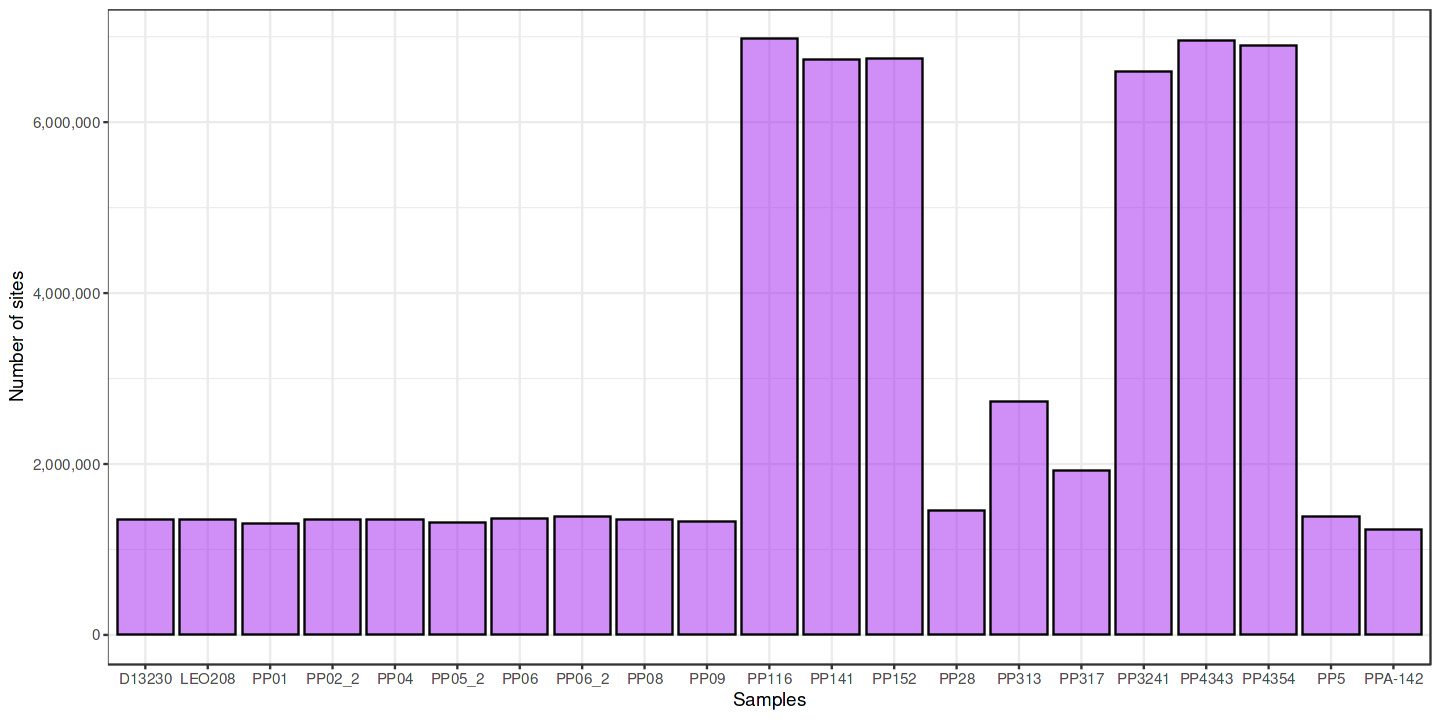

In [23]:
# all sites 
options(repr.plot.width = 12, repr.plot.height = 6)
nsites <- ggplot(het, aes(x = INDV, y = N_SITES)) + 
    geom_bar(stat = "identity", fill="purple", colour="black", alpha = 0.5) +
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 14)) +
    xlab('Samples') +
    ylab('Number of sites') +
    scale_y_continuous(labels = label_comma()) +
    theme_bw()
nsites

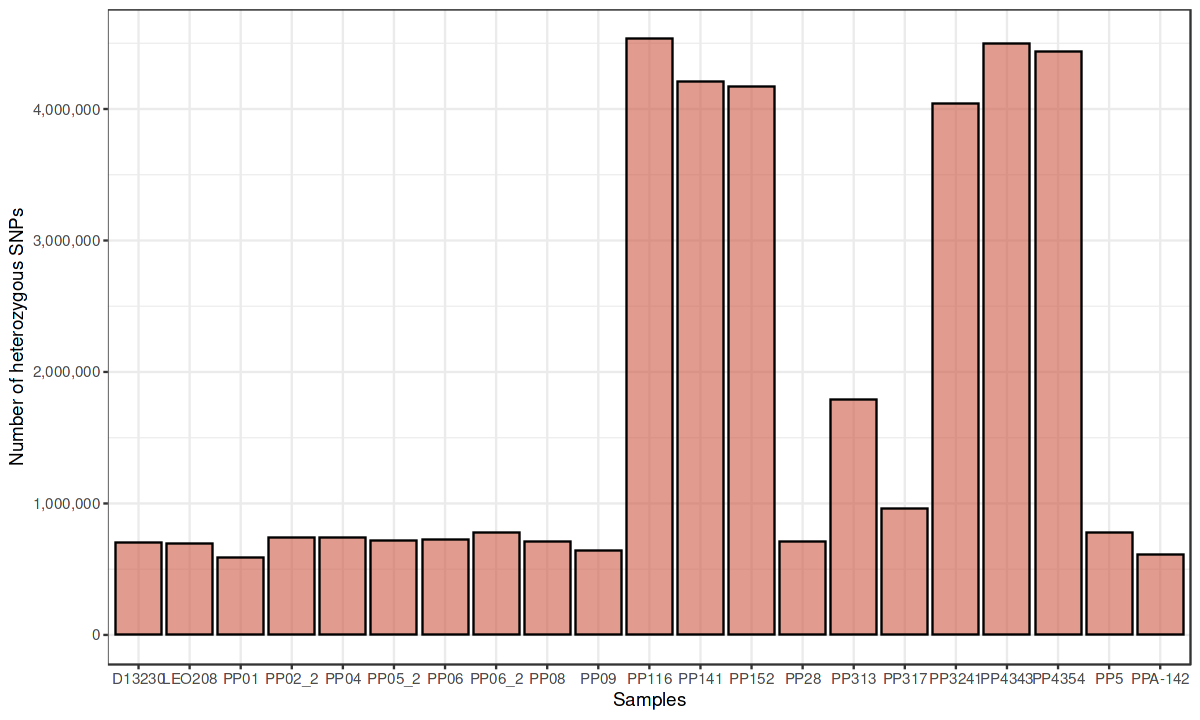

In [61]:
# number of heterozygous sites
options(repr.plot.width = 10, repr.plot.height = 6)
nhet <- ggplot(het, aes(x = INDV, y = O.HET)) + 
    geom_bar(stat = "identity", fill="coral3", colour="black", alpha = 0.6) +
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 14)) +
    xlab('Samples') +
    ylab('Number of heterozygous SNPs') +
    scale_y_continuous(labels = label_comma()) +
    theme_bw()

nhet

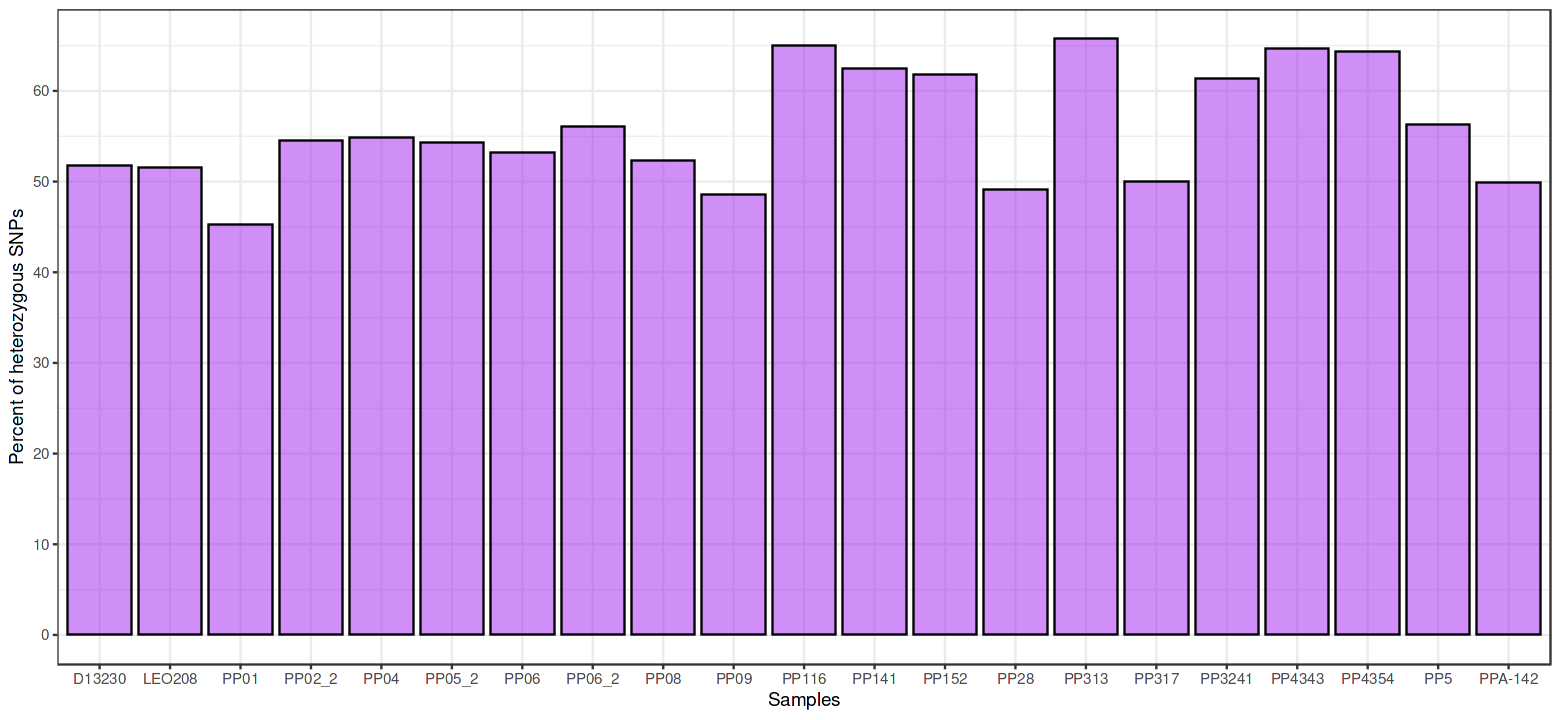

In [10]:
options(repr.plot.width = 13, repr.plot.height = 6)
phet <- ggplot(het, aes(x = INDV, y = prop)) + 
    geom_bar(stat = "identity", fill="purple", colour="black", alpha = 0.5) +
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 14)) +
    xlab('Samples') +
    ylab('Percent of heterozygous SNPs') +
    scale_y_continuous(breaks = seq(0, 70, by = 10)) +
    theme_bw()

phet

In [16]:
het2 <- read.table('/kaggle/input/heterozygosity-simple/Leopards samples - 4.csv',sep=',', header = T)
het2

Sample,NHET,Het,PercentHet
<chr>,<int>,<dbl>,<dbl>
PP317,959469,0.0003765625,0.038
PP313,1794465,0.0007042730,0.070
PP28,714125,0.0002802724,0.028
PP116,4532928,0.0017790366,0.178
PP3241,4042841,0.0015866924,0.159
PP4343,4499897,0.0017660730,0.177
PP4354,4438122,0.0017418282,0.174
PP141,4205659,0.0016505935,0.165
PP152,4170459,0.0016367786,0.164


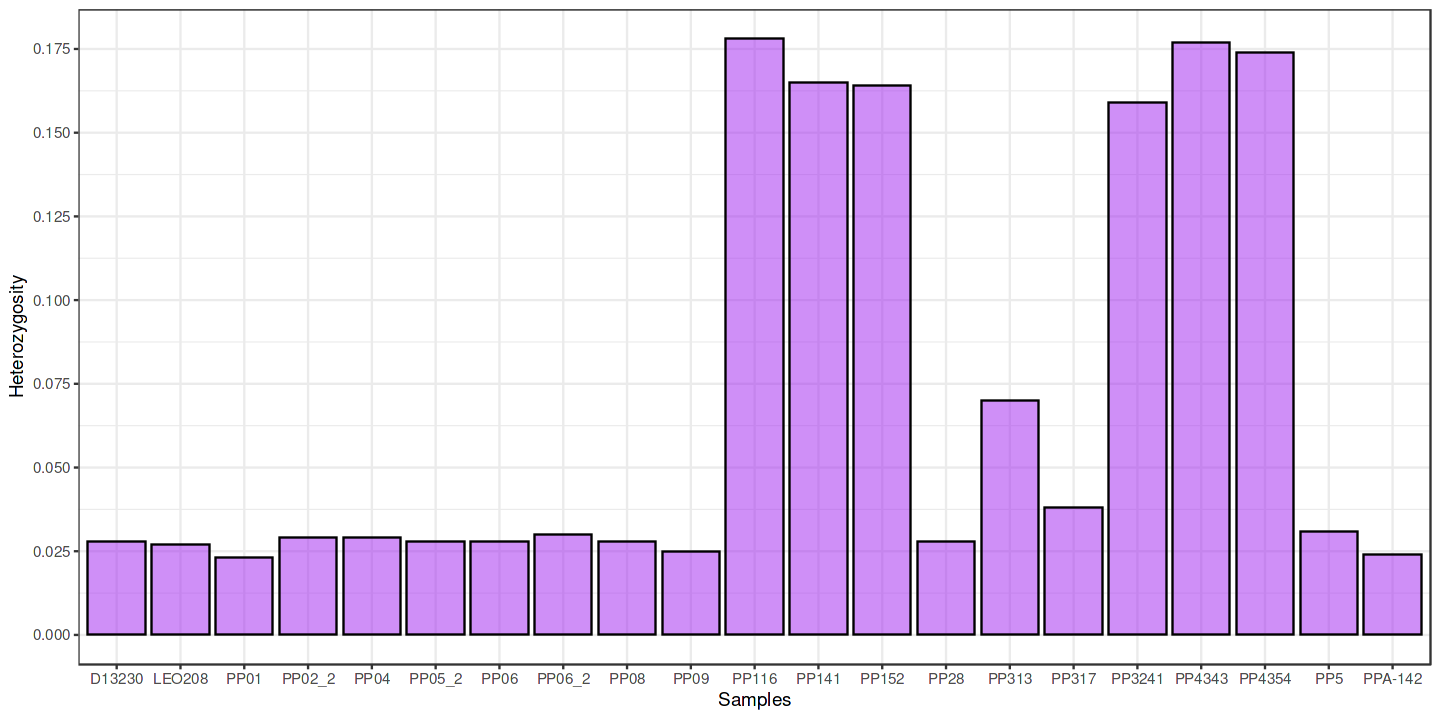

In [17]:
options(repr.plot.width = 12, repr.plot.height = 6)
het2 <- ggplot(het2, aes(x = Sample, y = PercentHet)) + 
    geom_bar(stat = "identity", fill="purple", colour="black", alpha = 0.5) +
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 14)) +
    xlab('Samples') +
    ylab('Heterozygosity') +
    scale_y_continuous(breaks = seq(0, 0.20, by = 0.025)) +
    theme_bw()

het2

In [18]:
ggsave("het.png", 
       plot = het2, 
       height=6, width=12, units="in") 

In [24]:
ggsave("nsites.png", 
       plot = nsites, 
       height=6, width=12, units="in") 
ggsave("nhet.png", 
       plot = nhet, 
       height=6, width=10, units="in") 

ERROR: Error in plot_theme(plot): object 'nhet' not found


# SNP density 

In [8]:
# open file (output from vcftools --SNPdensity)
# LEO208 <- read.table('/kaggle/input/snpden/LEO208_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)

PP4354$NO_CHR <- str_extract_all(PP4354$CHROM,"\\(?[0-9,.]+\\)?")
PP4354$NO_CHR <- as.character(PP4354$NO_CHR)
PP4354$NO_CHR <- factor(PP4354$NO_CHR, levels=unique(PP4354$NO_CHR))
head(PP4354)

,CHROM,BIN_START,SNP_COUNT,VARIANTS.KB,NO_CHR
,<chr>,<int>,<int>,<int>,<fct>
1,HiC_scaffold_1,0,12,12,1
2,HiC_scaffold_1,1000,3,3,1
3,HiC_scaffold_1,2000,5,5,1
4,HiC_scaffold_1,3000,19,19,1
5,HiC_scaffold_1,4000,9,9,1
6,HiC_scaffold_1,5000,1,1,1


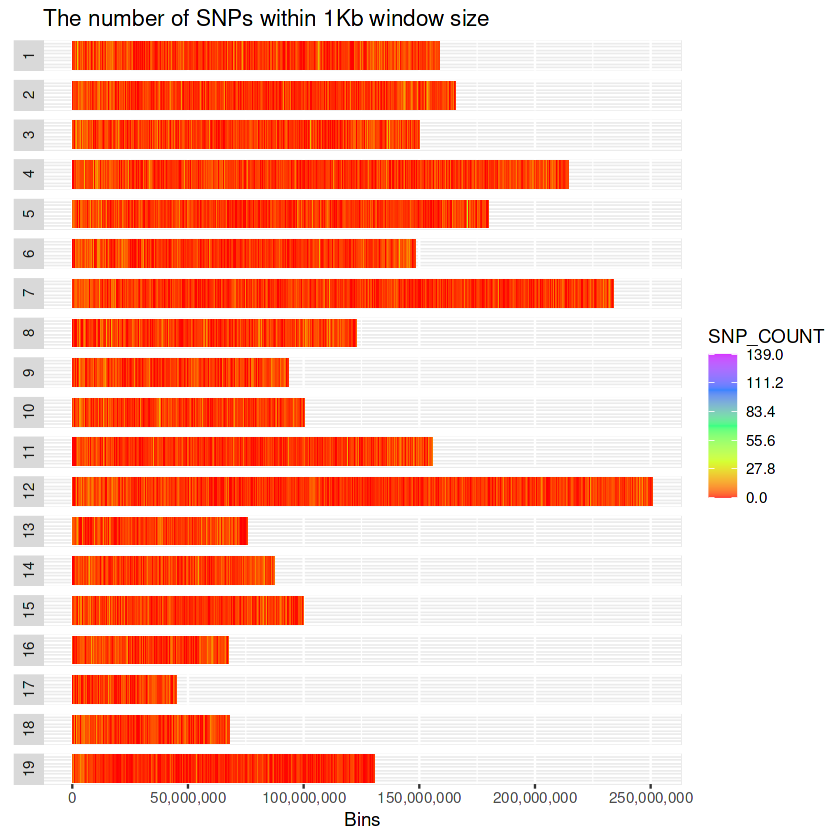

In [10]:
# plot for individual 
p <- ggplot(data = PP4354, aes(x = BIN_START, y=1), binwidth = 1e4) +
    facet_grid(NO_CHR ~ ., switch = 'y') +
    geom_tile(aes(fill=SNP_COUNT)) +
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        strip.text.y = element_text(angle = 180)) +
    xlab('Bins') +
    ylab ('Scaffolds') +
    ggtitle('The number of SNPs within 1Kb window size') +
    scale_fill_gradientn(colours = rainbow(5, alpha = 0.8), breaks=seq(min(PP4354$SNP_COUNT),max(PP4354$SNP_COUNT),(max(PP4354$SNP_COUNT)-min(PP4354$SNP_COUNT))/5)) +
    scale_x_continuous(labels = label_comma()) 
p

In [20]:
ggsave("pp09_snpden.png", 
       plot = p, 
       height=6, width=10, units="in") 

In [1]:
# upload all data
D13230 <- read.table('/kaggle/input/snpden/D13230_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
D13230_count <- D13230$VARIANTS.KB
LEO208 <- read.table('/kaggle/input/snpden/LEO208_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
LEO208_count <- LEO208$VARIANTS.KB
PP01 <- read.table('/kaggle/input/snpden/PP01_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP01_count <- PP01$VARIANTS.KB
PP02_2 <- read.table('/kaggle/input/snpden/PP02_2_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP02_2_count <- PP02_2$VARIANTS.KB
PP04<- read.table('/kaggle/input/snpden/PP04_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP04_count <- PP04$VARIANTS.KB
PP05_2 <- read.table('/kaggle/input/snpden/PP05_2_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP05_2_count <- PP05_2$VARIANTS.KB
PP06 <- read.table('/kaggle/input/snpden/PP06_nomito_snps_HD_PASS_DP5.vcf.gz.densityPerKb.snpden', sep = '\t', header = T)
PP06_count <- PP06$VARIANTS.KB
PP06_2 <- read.table('/kaggle/input/snpden/PP06_2_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP06_2_count <- PP06_2$VARIANTS.KB
PP08 <- read.table('/kaggle/input/snpden/PP08_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP08_count <- PP08$VARIANTS.KB
PP09 <- read.table('/kaggle/input/snpden/PP09_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP09_count <- PP09$VARIANTS.KB
PP116 <- read.table('/kaggle/input/snpden/PP116.densityPerKb.snpden', sep = '\t', header = T)
PP116_count <- PP116$VARIANTS.KB
PP141 <- read.table('/kaggle/input/snpden/PP141.densityPerKb.snpden', sep = '\t', header = T)
PP141_count <- PP141$VARIANTS.KB
PP152 <- read.table('/kaggle/input/snpden/PP152.densityPerKb.snpden', sep = '\t', header = T)
PP152_count <- PP152$VARIANTS.KB
PP28 <- read.table('/kaggle/input/snpden/PP28_HF_PASS_densityPerKb.snpden', sep = '\t', header = T)
PP28_count <- PP28$VARIANTS.KB
PP313 <- read.table('/kaggle/input/snpden/PP313.densityPerKb.snpden', sep = '\t', header = T)
PP313_count <- PP313$VARIANTS.KB
PP317 <- read.table('/kaggle/input/snpden/PP317_HF_PASS_densityPerKb.snpden', sep = '\t', header = T)
PP317_count <- PP317$VARIANTS.KB
PP3241 <- read.table('/kaggle/input/snpden/PP3241_HF_PASS_densityPerKb.snpden', sep = '\t', header = T)
PP3241_count <- PP3241$VARIANTS.KB
PP4343 <- read.table('/kaggle/input/snpden/PP4343_HF_PASS_densityPerKb.snpden', sep = '\t', header = T)
PP4343_count <- PP4343$VARIANTS.KB
PP4354 <- read.table('/kaggle/input/snpden/PP4354_HF_PASS_densityPerKb.snpden', sep = '\t', header = T)
PP4354_count <- PP4354$VARIANTS.KB
PP5 <- read.table('/kaggle/input/snpden/PP5_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PP5_count <- PP5$VARIANTS.KB
PPA_142 <- read.table('/kaggle/input/snpden/PPA-142_nomito_snps_HD_PASS_DP5_densityPerKb.snpden', sep = '\t', header = T)
PPA_142_count <- PPA_142$VARIANTS.KB

In [5]:
max(PP4354_count)

[1] 139

In [21]:
# list of SNP counts
a <- list(LEO208_count, D13230_count, PP01_count, PP02_2_count, PP04_count, PP5_count, PP05_2_count, PP06_count, PP06_2_count, PP08_count, 
     PP09_count, PPA_142_count, PP116_count, PP141_count, PP152_count, PP28_count, PP313_count, PP317_count, PP3241_count, PP4343_count,
     PP4354_count)

In [22]:
# transform for ggplot
d <- data.frame(x = unlist(a), 
                grp = rep(letters[1:length(a)],times = sapply(a,length)))

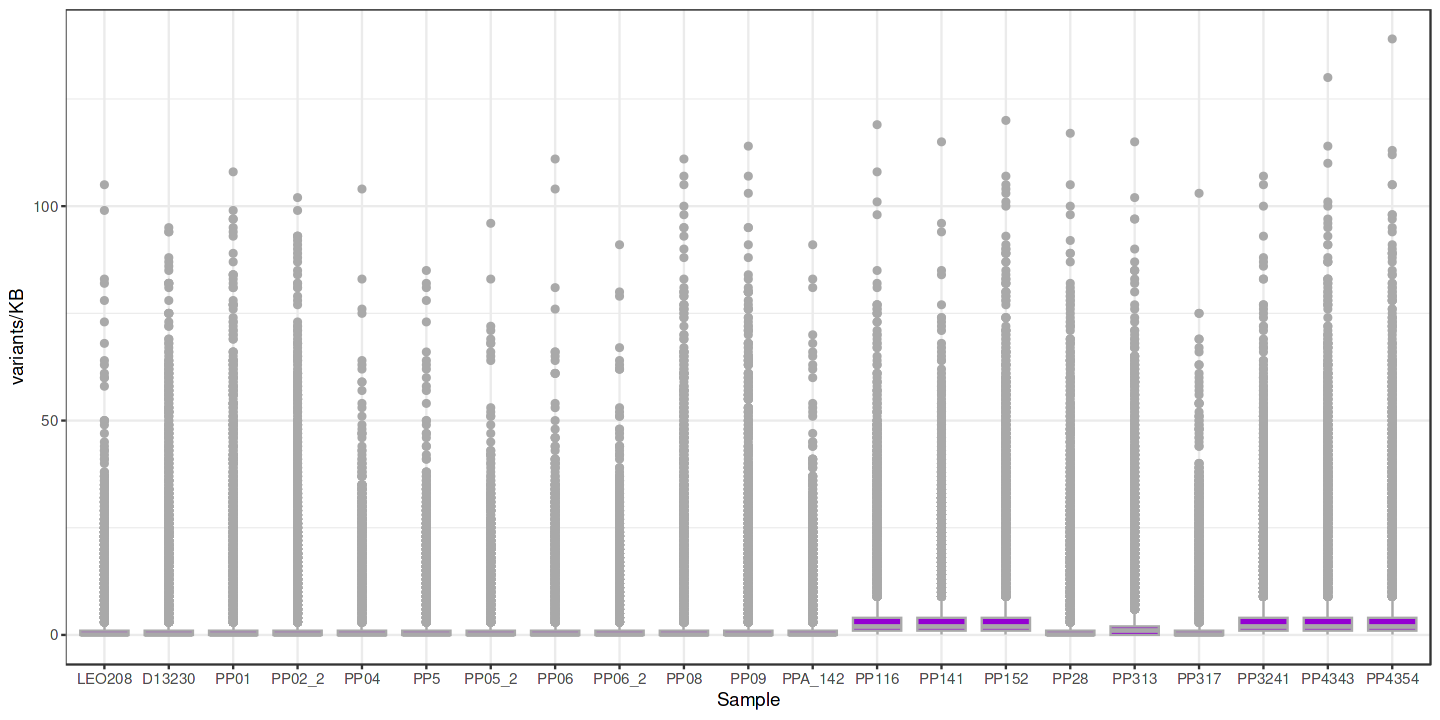

In [23]:
# plot density distibution
options(repr.plot.width = 12, repr.plot.height = 6)
den <- ggplot(d,aes(x = grp, y = x)) + 
    geom_boxplot(color="dark gray", fill="dark violet") +
    scale_x_discrete(labels = c('LEO208', 'D13230', 'PP01', 'PP02_2', 'PP04', 'PP5', 'PP05_2', 'PP06', 'PP06_2',
                                'PP08', 'PP09', 'PPA_142', 'PP116', 'PP141', 'PP152', 'PP28',
                                'PP313', 'PP317', 'PP3241', 'PP4343', 'PP4354')) +
    theme_bw() +
    xlab('Sample') +
    ylab('variants/KB')
den

In [24]:
ggsave("all_snpden.png", 
       plot = den, 
       height=6, width=12, units="in") 

# ROH

In [25]:
# prepare files (output from plink)
roh6 <- read.table('/kaggle/input/roh-analysis/6samples_plink.hom.hom', header = T)
roh12 <- read.table('/kaggle/input/roh-analysis/12samples_plink.hom.hom', header = T)
roh3 <- read.table('/kaggle/input/roh-analysis/3samples_plink.hom.hom', header = T)

max(roh6$KB)
min(roh6$KB)
max(roh12$KB)
min(roh12$KB)
max(roh3$KB)
min(roh3$KB)

roh_all <- rbind(roh6, roh12, roh3)
head(roh_all)

[1] 206.526

[1] 10.021

[1] 1432.62

[1] 10.029

[1] 234.773

[1] 10.013

,FID,IID,PHE,CHR,SNP1,SNP2,POS1,POS2,KB,NSNP,DENSITY,PHOM,PHET
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,PP116,PP116,-9,HiC_scaffold_1,.,.,2246128,2256956,10.829,101,0.107,0.743,0.010
2,PP116,PP116,-9,HiC_scaffold_1,.,.,5935996,5952507,16.512,135,0.122,0.785,0.022
3,PP116,PP116,-9,HiC_scaffold_1,.,.,44923944,44947810,23.867,113,0.211,0.779,0.035
4,PP116,PP116,-9,HiC_scaffold_1,.,.,44979702,44991090,11.389,131,0.087,0.817,0.038
5,PP116,PP116,-9,HiC_scaffold_1,.,.,66199453,66215114,15.662,169,0.093,0.746,0.047
6,PP116,PP116,-9,HiC_scaffold_1,.,.,68219480,68241112,21.633,156,0.139,0.788,0.000


In [26]:
# subset necessary columns
roh_all_short <- roh_all[,c(1,4,9,10)]
head(roh_all_short)
# write.csv(roh_all_short, '/kaggle/working/roh_all_short.csv', row.names=FALSE)

,FID,CHR,KB,NSNP
,<chr>,<chr>,<dbl>,<int>
1,PP116,HiC_scaffold_1,10.829,101
2,PP116,HiC_scaffold_1,16.512,135
3,PP116,HiC_scaffold_1,23.867,113
4,PP116,HiC_scaffold_1,11.389,131
5,PP116,HiC_scaffold_1,15.662,169
6,PP116,HiC_scaffold_1,21.633,156


In [28]:
# split KB values into groups 
conditions <- function(df) {
if (df[['KB']] >= 10 & df[['KB']]  < 50) {
return('10-50KB')
} else if (df[['KB']] >= 50 & df[['KB']]  < 100) {
return('50-100KB')
} else if (df[['KB']] >= 100 & df[['KB']]  < 150) {
return('100-150KB')
} else if (df[['KB']]  >= 150 & df[['KB']]  < 200) {
return('150-200KB')
} else if (df[['KB']] >= 200 & df[['KB']] < 500) {
return('200-500KB')
} else if (df[['KB']]  >= 500 & df[['KB']] < 1000) {
return('500-1000KB')
} else if (df[['KB']] >= 1000 & df[['KB']] < 1500) {
return('1000-1500KB')
}
}

conditions_soft <- function(df) {
if (df[['KB']] >= 0 & df[['KB']]  < 100) {
return('0-100KB')
} else if (df[['KB']] >= 100 & df[['KB']]  < 500) {
return('100-500KB')
} else if (df[['KB']] >= 500 & df[['KB']]  < 1000) {
return('500-1000KB')
} else if (df[['KB']] >= 1000 & df[['KB']]  < 1500) {
return('1000-1500KB')
}
}

roh_all_short$Class <- apply(roh_all_short, 1, conditions_soft)
tail(roh_all_short)

,FID,CHR,KB,NSNP,Class
,<chr>,<chr>,<dbl>,<int>,<chr>
17907,ERR5671313,HiC_scaffold_18,22.334,175,0-100KB
17908,ERR5671313,HiC_scaffold_18,31.334,205,0-100KB
17909,ERR5671313,HiC_scaffold_18,21.105,215,0-100KB
17910,ERR5671313,HiC_scaffold_18,19.270,106,0-100KB
17911,ERR5671313,HiC_scaffold_18,13.032,179,0-100KB
17912,ERR5671313,HiC_scaffold_19,14.349,169,0-100KB


In [34]:
# group classes to get number of ROHs in each  
roh_all_grouped <- aggregate(KB ~ FID + Class, data = roh_all_short, FUN = length)
roh_all_grouped <- roh_all_grouped[, c('FID', 'Class', 'KB')]
roh_all_grouped

roh_all_grouped$Class <- factor(roh_all_grouped$Class)

FID,Class,KB
<chr>,<chr>,<int>
D13230,0-100KB,520
ERR5056141,0-100KB,981
ERR5056152,0-100KB,859
ERR5671313,0-100KB,143
LEO208,0-100KB,500
PP01,0-100KB,579
PP02,0-100KB,474
PP04,0-100KB,468
PP05,0-100KB,458


In [36]:
roh_all_grouped$FID[roh_all_grouped$FID == 'ERR5056141'] <- 'PP141'
roh_all_grouped$FID[roh_all_grouped$FID == 'ERR5056152'] <- 'PP152'
roh_all_grouped$FID[roh_all_grouped$FID == 'ERR5671313'] <- 'PP313'

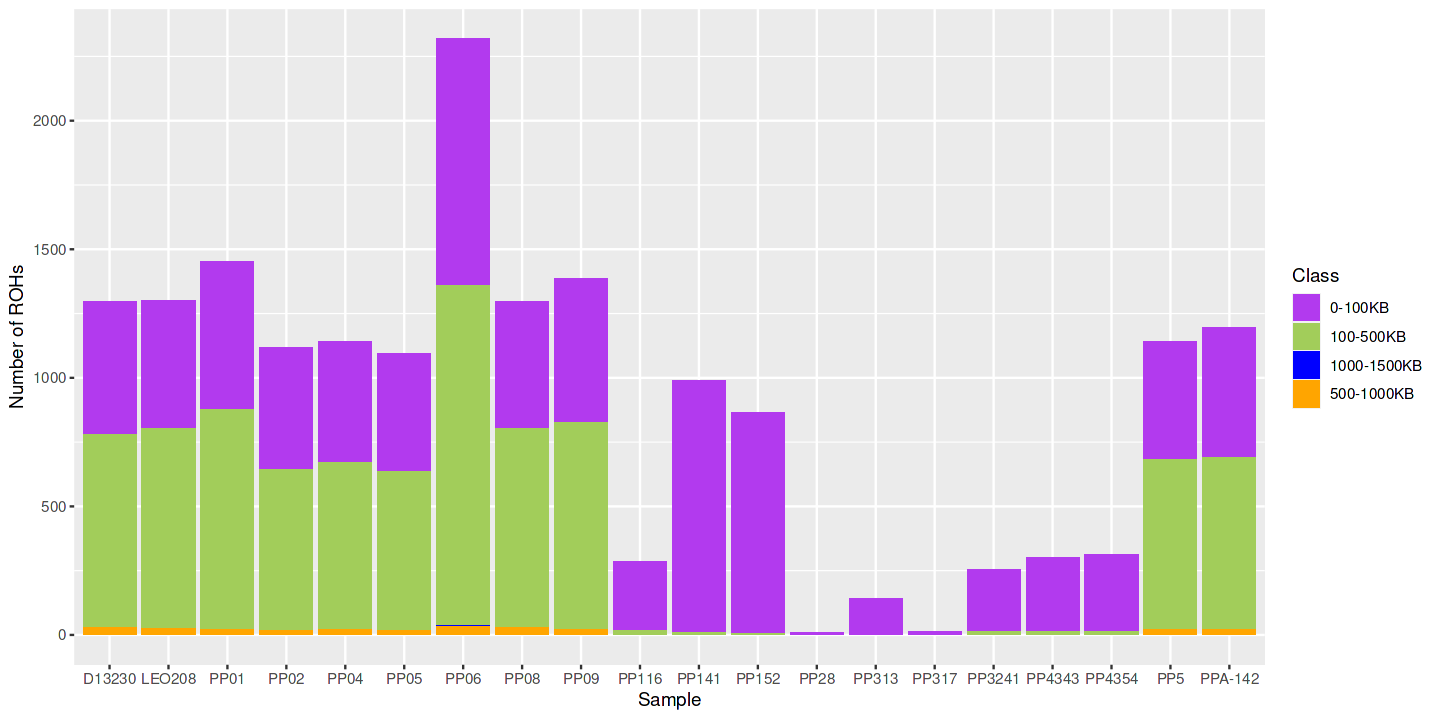

In [53]:
# plot ROHs distribution
roh <- ggplot(roh_all_grouped, aes(fill=Class, y=KB, x=FID)) + 
    geom_bar(position="stack", stat="identity") +
    xlab('Sample') +
    ylab('Number of ROHs') +
    scale_fill_manual(values = c('darkorchid2', 'darkolivegreen3', 'blue', 'orange'))
roh

In [54]:
ggsave("all_roh.png", 
       plot = roh, 
       height=6, width=12, units="in") 